# Load packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# import os
# os.getcwd()

Mounted at /content/drive


In [ ]:
!pip install scanpy
!pip install anndata
# !pip install scvi-tools

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 8.6 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=71a03d4750295ca249860159bf475fe69efa690d07f7398d62f9e37d97f5ac23
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [ ]:
!pip install scvi-tools@git+https://github.com/scverse/scvi-tools

  Cloning https://github.com/scverse/scvi-tools to /tmp/pip-install-zmhsijw9/scvi-tools_b6a18c22c8464c6996d99eee4452032c
  Running command git clone --filter=blob:none --quiet https://github.com/scverse/scvi-tools /tmp/pip-install-zmhsijw9/scvi-tools_b6a18c22c8464c6996d99eee4452032c
  Resolved https://github.com/scverse/scvi-tools to commit a435561ebab92410b8cb82e7a18dde5510222387
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.1/356.1 kB 30.

In [ ]:
import numpy as np
import pandas as pd
import os, errno
import datetime
import uuid
import itertools
import yaml
import subprocess
import scipy.sparse as sp
from scipy.spatial.distance import squareform
from sklearn.decomposition import non_negative_factorization
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.utils import sparsefuncs
from scipy.cluster.hierarchy import leaves_list
import matplotlib.pyplot as plt
from multiprocessing import Pool
import scanpy as sc
%matplotlib inline
from scipy.io import mmread
from IPython.display import Image
import anndata
import seaborn as sns
import scvi
from scvi.external import MRVI as MrVI

# Upload Data

In [ ]:
adata = sc.read_mtx(
    '/content/drive/My Drive/EGFRi_PI3Ki_MrVI/allPDCL/EGFRi_PI3Ki_UMI_count_filt_transpose.matrix'
)

# adata = adata.T

In [ ]:
# already filtered to adaptive up genes
genelist = pd.read_csv("/content/drive/My Drive/EGFRi_PI3Ki_MrVI/allPDCL/EGFRi_PI3Ki_rowData.csv",
                       sep=',',
                       header = 0)
genelist

adata.var_names = genelist["id"]

In [ ]:
colData = pd.read_csv('/content/drive/My Drive/EGFRi_PI3Ki_MrVI/allPDCL/EGFRi_PI3Ki_colData.csv')
colData

,P7,P5,sample,Size_Factor,n_umi,cell_ID,RT,Lig,RT_well_position,cell_line,...,top_to_second_best_ratio,Cell,log10_umi,percent_mito,num_genes_expressed,g1s_score,g2m_score,proliferation_index,replicate,sample_key
0,01F,A06,sciPlex,0.588149,593,01F_A06_RT_BC_100_Lig_BC_108,RT_BC_100,Lig_BC_108,A04,BT112,...,9.00,01F_A06_RT_BC_100_Lig_BC_108,2.773055,0.0,484,0.000000,1.808411,1.808411,2,Paxilisib_100_Osimertinib_10000
1,01F,A06,sciPlex,1.891400,1907,01F_A06_RT_BC_100_Lig_BC_116,RT_BC_100,Lig_BC_116,A04,BT112,...,4.25,01F_A06_RT_BC_100_Lig_BC_116,3.280351,0.0,1411,0.424423,0.000000,0.424423,1,DMSO_0_DMSO_0
2,01F,A06,sciPlex,0.566329,571,01F_A06_RT_BC_100_Lig_BC_122,RT_BC_100,Lig_BC_122,A04,BT112,...,5.00,01F_A06_RT_BC_100_Lig_BC_122,2.756636,0.0,467,0.000000,1.017315,1.017315,2,Paxilisib_100_Osimertinib_10000
3,01F,A06,sciPlex,0.713118,719,01F_A06_RT_BC_100_Lig_BC_126,RT_BC_100,Lig_BC_126,A04,BT112,...,4.00,01F_A06_RT_BC_100_Lig_BC_126,2.856729,0.0,596,0.000000,0.000000,0.000000,2,Paxilisib_100_Osimertinib_100
4,01F,A06,sciPlex,3.822474,3854,01F_A06_RT_BC_100_Lig_BC_138,RT_BC_100,Lig_BC_138,A04,BT112,...,19.00,01F_A06_RT_BC_100_Lig_BC_138,3.585912,0.0,2197,2.209365,1.742043,2.626039,2,DMSO_0_DMSO_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37087,12F,H06,sciPlex,0.731963,738,12F_H06_RT_BC_99_Lig_BC_144,RT_BC_99,Lig_BC_144,A03,BT112,...,4.00,12F_H06_RT_BC_99_Lig_BC_144,2.868056,0.0,604,2.218892,2.058083,2.774342,2,DMSO_0_Osimertinib_100
37088,12F,H06,sciPlex,0.432433,436,12F_H06_RT_BC_99_Lig_BC_156,RT_BC_99,Lig_BC_156,A03,BT112,...,3.00,12F_H06_RT_BC_99_Lig_BC_156,2.639486,0.0,367,0.000000,1.197702,1.197702,1,DMSO_0_MTX-211_5000
37089,12F,H06,sciPlex,0.570296,575,12F_H06_RT_BC_99_Lig_BC_181,RT_BC_99,Lig_BC_181,A03,BT112,...,5.00,12F_H06_RT_BC_99_Lig_BC_181,2.759668,0.0,464,1.012863,0.000000,1.012863,2,DMSO_0_Osimertinib_10000
37090,12F,H06,sciPlex,0.865859,873,12F_H06_RT_BC_99_Lig_BC_185,RT_BC_99,Lig_BC_185,A03,BT112,...,9.00,12F_H06_RT_BC_99_Lig_BC_185,2.941014,0.0,705,2.206565,2.206565,2.843101,2,Paxilisib_10_Osimertinib_100


In [ ]:
# patient (batch) annotations
PDCL = colData['cell_line']
adata.obs['PDCL'] = PDCL.values.astype('str')

# FCGBP annotations
batch = colData['replicate']
adata.obs['batch'] = batch.values.astype('str')

# treatment annotations
sample_key = colData['sample_key']
adata.obs['sample_key'] = sample_key.values.astype('str')

# Display anndata summary
adata

AnnData object with n_obs × n_vars = 37092 × 1783
    obs: 'PDCL', 'batch', 'sample_key'

In [ ]:
adata.obs['PDCL_batch'] = adata.obs['PDCL'] + '_' + adata.obs['batch'].astype(str)

adata.obs['PDCL_batch']

,PDCL_batch
0,BT112_2
1,BT112_1
2,BT112_2
3,BT112_2
4,BT112_2
...,...
37087,BT112_2
37088,BT112_1
37089,BT112_2
37090,BT112_2


In [ ]:
adata.obs['sample_key'].value_counts()

,count
sample_key,
DMSO_0_DMSO_0,5184
DMSO_0_Osimertinib_10,1155
DMSO_0_Paxilisib_100,1074
DMSO_0_Paxilisib_10,1056
DMSO_0_MTX-211_1000,1055
DMSO_0_MTX-211_100,1044
Paxilisib_100_Osimertinib_100,988
DMSO_0_Osimertinib_500,986
DMSO_0_Paxilisib_500,951


In [ ]:
adata.obs['PDCL_batch'].value_counts()

,count
PDCL_batch,
BT112_2,8917
BT112_1,7041
BT333_2,6031
BT333_1,5842
BT228_1,5637
BT228_2,3624


# Fit the model

In [ ]:
batch_key = 'PDCL_batch'
sample_key = 'sample_key'
labels_key = None

MrVI.setup_anndata(adata,
                   sample_key=sample_key,
                   batch_key=batch_key)

In [ ]:
model = MrVI(adata)
model.train(accelerator='gpu',
            early_stopping=True,
            max_epochs=400)

INFO     Jax module moved to cuda:0.Note: Pytorch lightning will show GPU is not being used for the Trainer.       


INFO: GPU available: True (cuda), used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


Training:   0%|          | 0/400 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:369: You have overridden `transfer_batch_to_device` in `LightningModule` but have passed in a `LightningDataModule`. It will use the implementation from `LightningModule` instance.


Monitored metric elbo_validation did not improve in the last 15 records. Best score: 543.939. Signaling Trainer to stop.


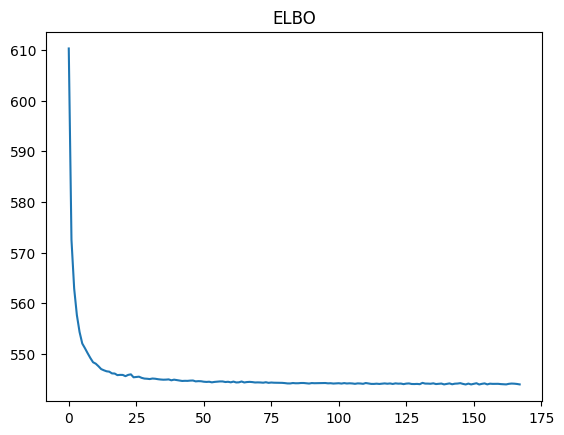

In [ ]:
plt.plot(model.history["elbo_validation"])
plt.title("ELBO")
plt.show()

In [ ]:

model.save(dir_path='/content/drive/My Drive/EGFRi_PI3Ki/allPDCL/allPDCL_EGFRi_PI3Ki_MrVI_model',
           overwrite=True,
           save_anndata=True)


# Get latent representations

In [ ]:
pip install pymde

In [ ]:
# from scvi.model.utils import mde

u = model.get_latent_representation(give_z=False)
adata.obsm["u"] = u
sc.pp.neighbors(adata, use_rep="u")
sc.tl.umap(adata, min_dist=0.3)


100%|██████████| 290/290 [00:03<00:00, 78.60it/s] 


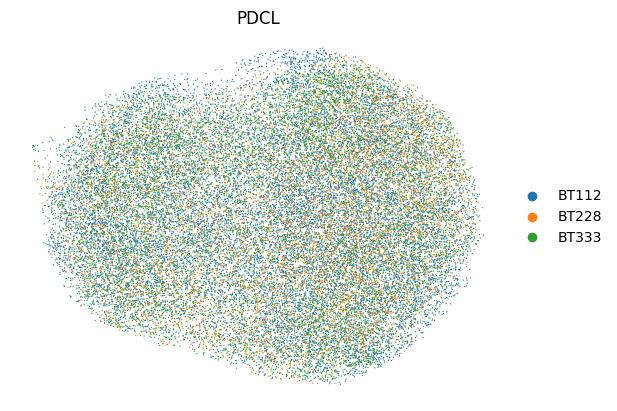

In [ ]:
# sc.pl.embedding(adata, basis="u_mde", color="PDCL", size=10)
sc.pl.umap(
    adata,
    color=["PDCL"],
    frameon=False,
    ncols=1,
)

In [ ]:
# save u space
np.savetxt("/content/drive/My Drive/EGFRi_PI3Ki_MrVI/allPDCL/EGFRi_PI3Ki_MrVI_u_factor.csv", u, delimiter=",")

In [ ]:
z = model.get_latent_representation(give_z=True)
adata.obsm["z"] = z
sc.pp.neighbors(adata, use_rep="z")
sc.tl.umap(adata, min_dist=0.3)

100%|██████████| 290/290 [00:04<00:00, 61.76it/s] 


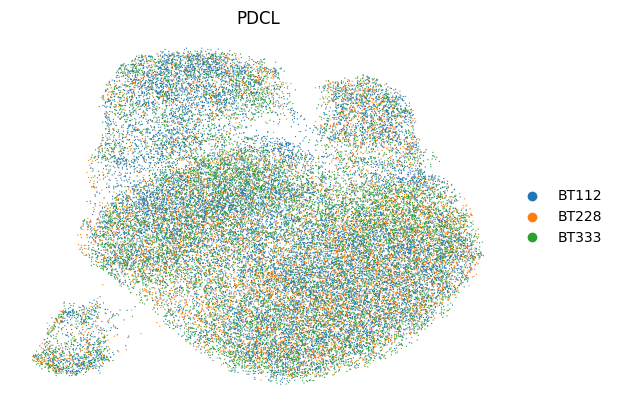

In [ ]:
sc.pl.umap(
    adata,
    color=["PDCL"],
    frameon=False,
    ncols=1,
)

In [ ]:
# save z space
np.savetxt("/content/drive/My Drive/EGFRi_PI3Ki_MrVI/allPDCL/EGFRi_PI3Ki_MrVI_z_factor.csv", z, delimiter=",")

# Cell distances

In [ ]:
# Compute local sample representations
cell_reps = model.get_local_sample_representation(adata)

100%|██████████| 145/145 [00:22<00:00,  6.39it/s]


In [ ]:
import xarray as xr

batch_key = 'PDCL_batch'
sample_key = 'sample_key'
labels_key = None

cell_dists = model.get_local_sample_distances(
        adata,
        use_mean=True,
        normalize_distances=False,
        keep_cell=False,
        groupby=sample_key,
    )

# save dists
cell_dists.to_netcdf("/content/drive/My Drive/EGFRi_PI3Ki_MrVI/allPDCL/EGFRi_PI3Kicell_dists_attention.nc")

100%|██████████| 145/145 [01:44<00:00,  1.38it/s]


In [ ]:
import xarray as xr

batch_key = 'PDCL_batch'
sample_key = 'sample_key'
labels_key = None

cell_dists = model.get_local_sample_distances(
        adata,
        keep_cell=True,
        groupby=sample_key,
    )

# save dists
cell_dists.to_netcdf("/content/drive/My Drive/EGFRi_PI3Ki_MrVI/allPDCL/EGFRi_PI3Kicell_dists_attention_singlecell.nc")

100%|██████████| 145/145 [01:25<00:00,  1.69it/s]


In [ ]:
print(cell_dists.head())

<xarray.Dataset> Size: 2kB
Dimensions:          (cell_name: 5, sample_x: 5, sample_y: 5, sample_key_name: 5)
Coordinates:
  * cell_name        (cell_name) object 40B '0' '1' '2' '3' '4'
  * sample_x         (sample_x) object 40B 'DMSO_0_DMSO_0' ... 'DMSO_0_MTX-21...
  * sample_y         (sample_y) object 40B 'DMSO_0_DMSO_0' ... 'DMSO_0_MTX-21...
  * sample_key_name  (sample_key_name) <U33 660B 'DMSO_0_DMSO_0' ... 'DMSO_0_...
Data variables:
    cell             (cell_name, sample_x, sample_y) float32 500B ...
    sample_key       (sample_key_name, sample_x, sample_y) float32 500B ...


In [ ]:

import xarray as xr

# load dists
cell_dists = xr.open_dataset("/content/drive/My Drive/EGFRi_PI3Ki_MrVI/allPDCL/adaptive_features_allcells/EGFRi_PI3Kicell_dists_attention_singlecell.nc")
cell_dists


<xarray.Dataset> Size: 275MB
Dimensions:          (cell_name: 37092, sample_x: 43, sample_y: 43,
                      sample_key_name: 43)
Coordinates:
  * cell_name        (cell_name) object 297kB '0' '1' '2' ... '37090' '37091'
  * sample_x         (sample_x) object 344B 'DMSO_0_DMSO_0' ... 'Paxilisib_10...
  * sample_y         (sample_y) object 344B 'DMSO_0_DMSO_0' ... 'Paxilisib_10...
  * sample_key_name  (sample_key_name) object 344B 'DMSO_0_DMSO_0' ... 'Paxil...
Data variables:
    cell             (cell_name, sample_x, sample_y) float32 274MB ...
    sample_key       (sample_key_name, sample_x, sample_y) float32 318kB ...

In [ ]:
# create a DataFrame for mean sample-sample distances across all cells

drug_dist_df = pd.DataFrame(
        cell_dists['sample_key'].mean(axis=0),
        columns = cell_dists['sample_x'].values,
        index = cell_dists['sample_x'].values
)
drug_dist_df
drug_dist_df.to_csv('/content/drive/My Drive/EGFRi_PI3Ki_MrVI/allPDCL/EGFRi_PI3Ki_mrvi_dist_df_attention.csv')

In [ ]:
# Avg distance from other samples per cell: vector to quantify sample effect heterogeneity within cell populations
# of interest e.g. response modules or drug-dose conditions
cell_dists = cell_dists['cell']

dist_vec = []
hpf_state_anno = []
target_anno = []

for i in range(cell_dists.shape[0]):
    hpf_state_temp = adata.obs['sample_key'].iloc[i]
    hpf_state_temp_index = np.where(cell_dists['sample_x'].to_numpy() == hpf_state_temp)[0][0]
    vec_temp = cell_dists[i,hpf_state_temp_index,:].to_numpy()
    dist_vec.append(vec_temp)
    hpf_state_anno.append([hpf_state_temp]*len(vec_temp))
    target_anno.append(cell_dists[i,:]['sample_y'].values.tolist())

dist_vec = np.concatenate(dist_vec,axis=0)
hpf_state_anno = np.concatenate(hpf_state_anno,axis=0)
target_anno = np.concatenate(target_anno,axis=0)

In [ ]:
# HPF state-specific distribution of distances

counterfactual_df = pd.DataFrame(dist_vec,
                                 columns=['Counterfactual Distance'],
                                 index=hpf_state_anno
                                )
counterfactual_df['sample_drug'] = hpf_state_anno
counterfactual_df['target_drug'] = target_anno

counterfactual_df
counterfactual_df.to_csv('/content/drive/My Drive/EGFRi_PI3Ki_MrVI/allPDCL/adaptive_features_allcells/EGFRi_PI3Kicell_dists_attention_singlecell.csv')

In [ ]:
counterfactual_df

,Counterfactual Distance,sample_drug,target_drug
Paxilisib_100_Osimertinib_10000,0.381027,Paxilisib_100_Osimertinib_10000,DMSO_0_DMSO_0
Paxilisib_100_Osimertinib_10000,0.387089,Paxilisib_100_Osimertinib_10000,DMSO_0_MTX-211_10
Paxilisib_100_Osimertinib_10000,0.370094,Paxilisib_100_Osimertinib_10000,DMSO_0_MTX-211_100
Paxilisib_100_Osimertinib_10000,0.365244,Paxilisib_100_Osimertinib_10000,DMSO_0_MTX-211_1000
Paxilisib_100_Osimertinib_10000,0.566897,Paxilisib_100_Osimertinib_10000,DMSO_0_MTX-211_10000
...,...,...,...
Paxilisib_1000_Osimertinib_5000,0.377347,Paxilisib_1000_Osimertinib_5000,Paxilisib_10_Osimertinib_100
Paxilisib_1000_Osimertinib_5000,0.329746,Paxilisib_1000_Osimertinib_5000,Paxilisib_10_Osimertinib_1000
Paxilisib_1000_Osimertinib_5000,0.286660,Paxilisib_1000_Osimertinib_5000,Paxilisib_10_Osimertinib_10000
Paxilisib_1000_Osimertinib_5000,0.325229,Paxilisib_1000_Osimertinib_5000,Paxilisib_10_Osimertinib_500


# Sample-sample dist matrix

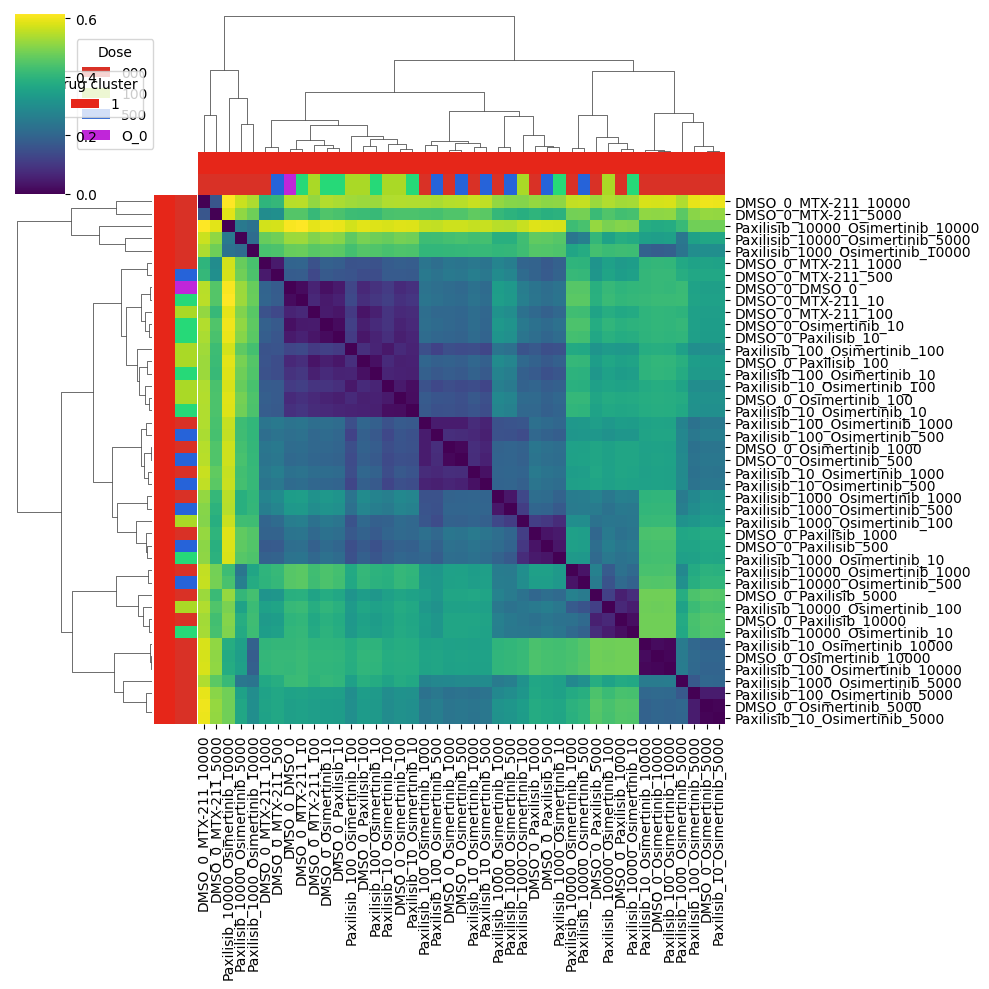

In [ ]:
# HEATMAP: Sample-Sample dist matrix

from scipy.spatial import distance
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster

cluster_method = 'complete'

row_linkage = hierarchy.linkage(
    distance.pdist(drug_dist_df),
    method=cluster_method
)

col_linkage = row_linkage

row_col_labels = fcluster(col_linkage, t=10, criterion='distance')
# row_col_labels = np.array([i[0] for i in drug_cluster_labels.values.tolist()])
lut = dict(zip(set(row_col_labels), sns.hls_palette(len(set(row_col_labels)), l=0.5, s=0.8)))
row_col = pd.DataFrame(row_col_labels)[0].map(lut)

labels2 = np.array([i[-3:] for i in drug_dist_df.columns.values])
lut2 = dict(zip(set(labels2), sns.hls_palette(len(set(labels2)), l=0.5, s=0.7)))
row_col2 = pd.DataFrame(labels2)[0].map(lut2)

g = sns.clustermap(drug_dist_df,
                   row_linkage=row_linkage,
                   col_linkage=col_linkage,
                   method=cluster_method,
                   row_colors = [row_col, row_col2],
                   col_colors = [row_col, row_col2],
                   annot=False,
                   figsize=(10, 10),
                   cmap='viridis',
                   yticklabels=True,xticklabels=True)
                   # vmin=0,vmax=2)

from matplotlib.pyplot import gcf

for label in np.unique(row_col_labels):
    g.ax_col_dendrogram.bar(0, 0, color=lut[label], label=label, linewidth=0)
l1 = g.ax_col_dendrogram.legend(title='Drug cluster', loc="center",
                               bbox_to_anchor=(0.1, 0.9), bbox_transform=gcf().transFigure,
                               ncol=2)

for label in np.unique(labels2):
    g.ax_row_dendrogram.bar(0, 0, color=lut2[label], label=label, linewidth=0)
l2 = g.ax_row_dendrogram.legend(title='Dose', loc="center",
                               bbox_to_anchor=(0.12, 0.9), bbox_transform=gcf().transFigure)

plt.show()